# FISH - Pipeline - A Python notebook to simulate FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa


In [3]:
# initializing Microscope simulation 
cell_library_folder_path = current_dir.joinpath('cell_library')
list_library_cells, dataframe_cell_library, background_pixels_library = fa.MicroscopeSimulation().initialize(cell_library_folder_path)

___

# Function to simulate cell positions

In [4]:
image_size_Y_X = [5000,5000]
number_of_cells_in_simulation = 100
simulation_dataframe,complete_image_size_Z_Y_X = fa.MicroscopeSimulation().generate_simulated_positions(image_size_Y_X,number_of_cells_in_simulation,list_library_cells,dataframe_cell_library)
simulation_dataframe.tail()

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
95,844,3634,890,3678,27,93,88,6210,259,0,0,0,0,61
96,695,1299,735,1340,27,80,83,4729,286,82,0,0,0,12
97,2059,2148,2095,2201,27,72,106,5381,244,82,0,0,0,16
98,1667,2196,1716,2243,27,98,95,6724,296,55,0,0,0,41
99,1256,4471,1305,4511,27,98,80,5473,273,41,0,0,0,67


# Generate simulation on demand

z-position:  7


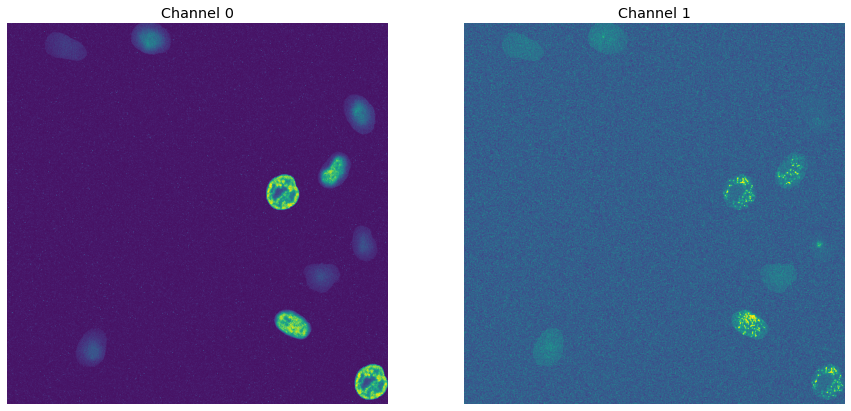

In [8]:
# Region to display
z_position = 7 #[-13:13]
y_position =  2000
x_position = 2000
x_size = 960
y_size = 960
simulated_image,dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)
# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
print('z-position: ', str(z_position))
for i in range (number_color_channels):
    #simulated_image_removed_extreme_values = simulated_image[:,:,i]#fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)

    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    #print('mean int ch: ',str(i),' ' , np.mean(simulated_image_removed_extreme_values))
plt.show()



 Output folder name :  termi___nuc_80__cyto_0__psfz_500__psfyx_300__ts_None

 ###################### 
        IMAGE : 0
 ###################### 
    Image Name :   temp.tif


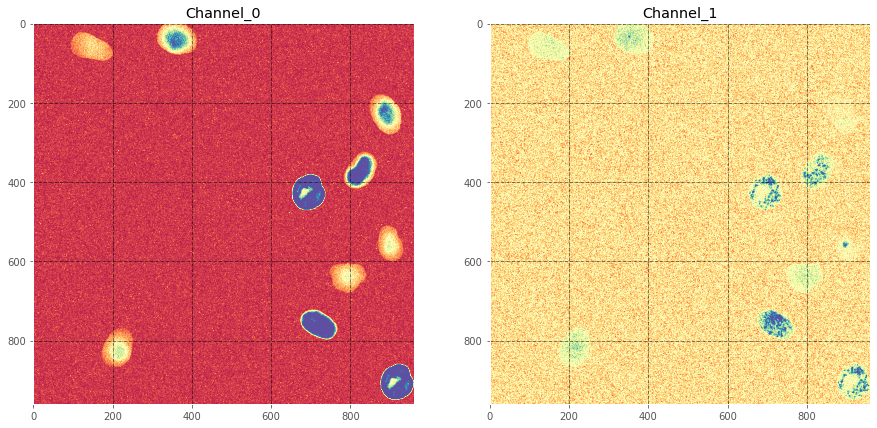

    Original Image Shape :                    [1, 960, 960, 2]
    Image sharpness metric :                  1.204
    Number of detected cells:                 10


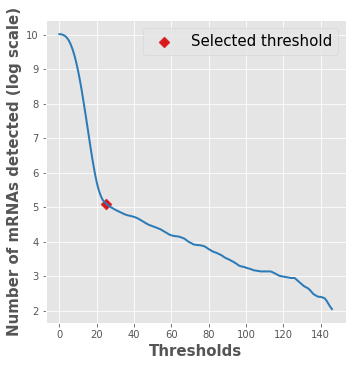

Z-Slice:  0


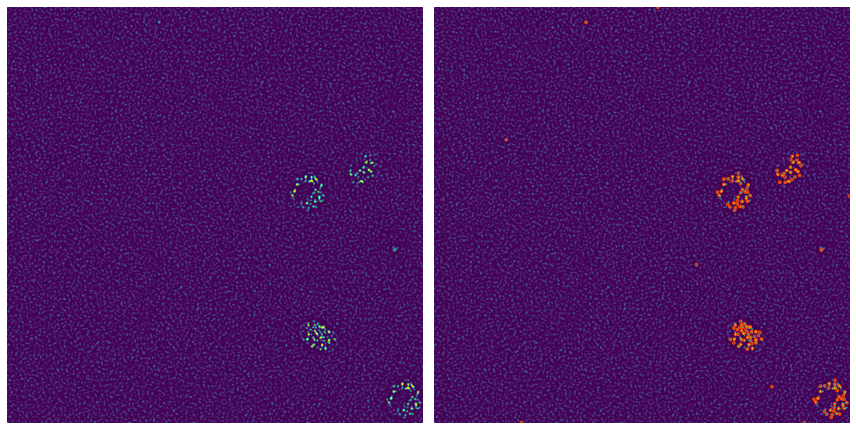

    Intensity threshold for spot detection :  [25.0]
    Average detected spots per cell :         [11]
    Maximum detected spots per cell :         [36]


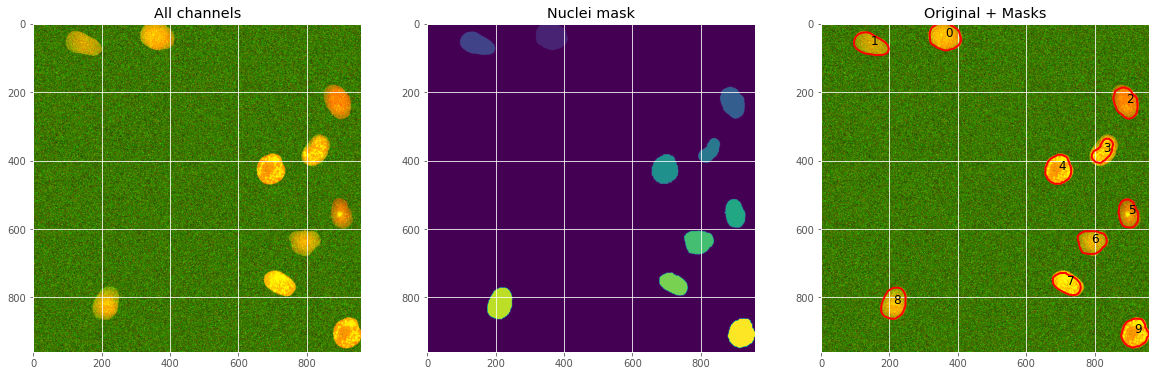

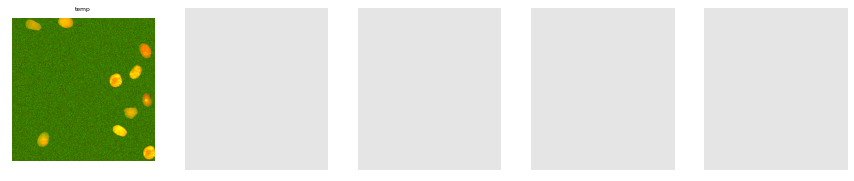

In [9]:
dataframe, list_masks_complete_cells, list_masks_nuclei, list_masks_cytosol_no_nuclei, output_identification_string = fa.PipelineFISH(
                                        image=simulated_image,
                                        channels_with_cytosol=None, 
                                        channels_with_nucleus=[0], 
                                        channels_with_FISH=[1],
                                        diameter_nucleus=80, 
                                        diameter_cytosol=0, 
                                        voxel_size_z=500,
                                        voxel_size_yx=130,
                                        file_name_str ='temp',
                                        psf_z=500,
                                        psf_yx=300,  
                                        folder_name='termi' 
                                        ).run()

In [7]:
raise

RuntimeError: No active exception to reraise

In [ ]:
#dataframe_cells_in_image

In [ ]:
z_position = 15
y_position =  1200
x_position = 1000
x_size = 960
y_size = 960
simulated_image, dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library,
                                                                                           alpha_0=0,
                                                                                           alpha_1=0.0005,
                                                                                           alpha_2=0.0005)




In [ ]:
raise

In [ ]:
# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
for i in range (number_color_channels):
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    simulated_image_removed_extreme_values[0,0]=300
    simulated_image_removed_extreme_values[0,1]=2000
    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    print(np.min(simulated_image_removed_extreme_values),np.max(simulated_image_removed_extreme_values))
plt.show()

In [ ]:
dataframe_cells_in_image